In [47]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [48]:
df=sns.load_dataset('diamonds')
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   carat    53940 non-null  float64 
 1   cut      53940 non-null  category
 2   color    53940 non-null  category
 3   clarity  53940 non-null  category
 4   depth    53940 non-null  float64 
 5   table    53940 non-null  float64 
 6   price    53940 non-null  int64   
 7   x        53940 non-null  float64 
 8   y        53940 non-null  float64 
 9   z        53940 non-null  float64 
dtypes: category(3), float64(6), int64(1)
memory usage: 3.0 MB


In [50]:
df.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [51]:
df.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

In [52]:
num_cols=df.select_dtypes(include=['float64','int64']).columns
cat_cols=df.select_dtypes(include=['category']).columns

num_cols


Index(['carat', 'depth', 'table', 'price', 'x', 'y', 'z'], dtype='object')

In [53]:
cat_cols

Index(['cut', 'color', 'clarity'], dtype='object')

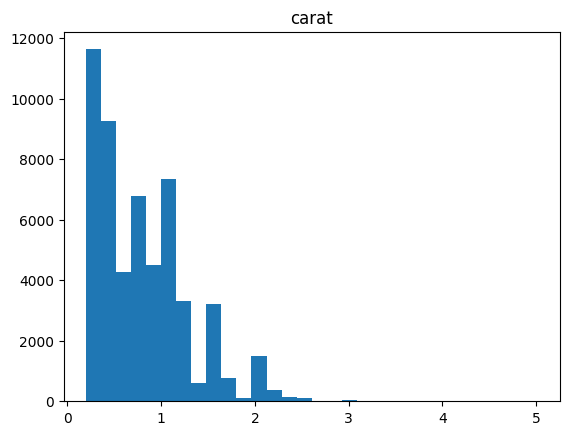

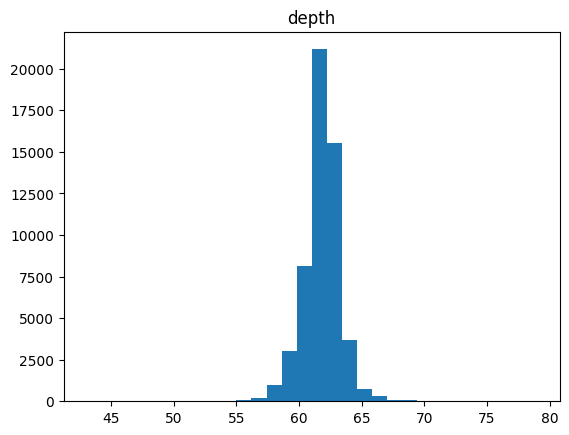

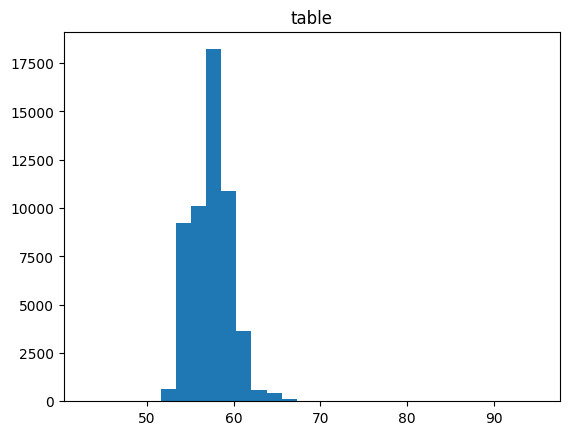

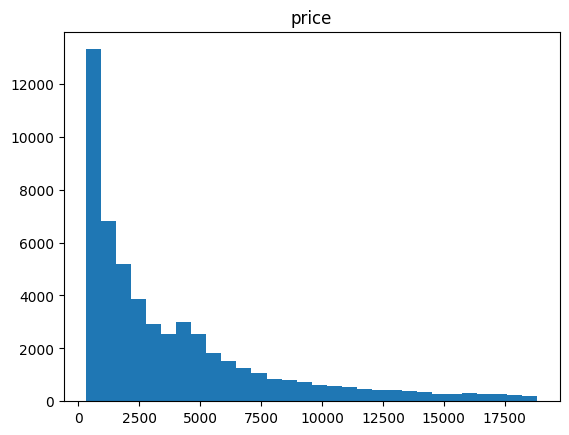

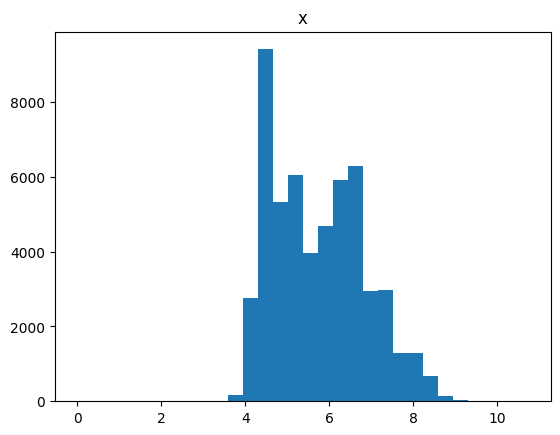

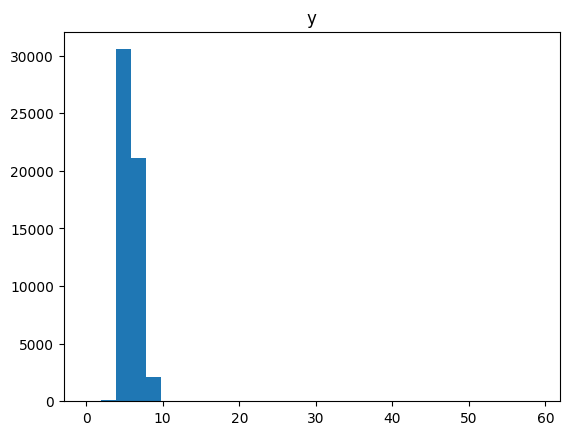

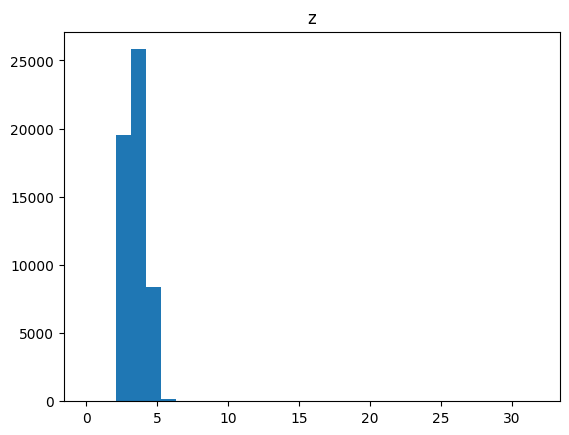

In [54]:
for col in num_cols:
    plt.hist(df[col].dropna(),bins=30)
    plt.title(col)
    plt.show()

In [55]:
df[num_cols]=df[num_cols].fillna(df[num_cols].median())
df[cat_cols]=df[cat_cols].fillna(df[cat_cols].mode().iloc[0])


In [56]:
df[num_cols].skew()

carat    1.116646
depth   -0.082294
table    0.796896
price    1.618395
x        0.378676
y        2.434167
z        1.522423
dtype: float64

In [57]:
for col in num_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    outliers = ((df[col] < lower) | (df[col] > upper)).sum()

    print(col, "Lower:", lower, "Upper:", upper, "Outliers:", outliers)


carat Lower: -0.5599999999999999 Upper: 2.0 Outliers: 1889
depth Lower: 58.75 Upper: 64.75 Outliers: 2545
table Lower: 51.5 Upper: 63.5 Outliers: 605
price Lower: -5611.375 Upper: 11885.625 Outliers: 3540
x Lower: 1.9649999999999999 Upper: 9.285 Outliers: 32
y Lower: 1.9899999999999993 Upper: 9.27 Outliers: 29
z Lower: 1.2150000000000003 Upper: 5.734999999999999 Outliers: 49


In [58]:
def handle_outliers_iqr(df, num_cols):
    for col in num_cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1

        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR

        df[col] = df[col].clip(lower, upper)

    return df

df = handle_outliers_iqr(df, num_cols)


In [59]:
df[num_cols].skew()

carat    0.899893
depth   -0.228261
table    0.473306
price    1.148304
x        0.389029
y        0.385351
z        0.374472
dtype: float64

In [60]:
df[num_cols].describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.792558,61.749156,57.438561,3732.145690,5.731285,5.733311,3.538500
std,0.457089,1.270254,2.161139,3436.769344,1.119956,1.111950,0.692494
min,0.200000,58.750000,51.500000,326.000000,1.965000,1.990000,1.215000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,2.000000,64.750000,63.500000,11885.625000,9.285000,9.270000,5.735000


In [61]:
#scaling

from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
df[num_cols]=scaler.fit_transform(df[num_cols])

In [62]:
df[num_cols].describe()

,carat,depth,table,price,x,y,z
count,5.394000e+04,5.394000e+04,5.394000e+04,5.394000e+04,5.394000e+04,5.394000e+04,5.394000e+04
mean,1.854735e-16,3.993608e-15,5.780240e-16,1.517511e-16,-5.226981e-16,-1.454281e-16,3.625164e-16
std,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00
min,-1.296386e+00,-2.361089e+00,-2.747910e+00,-9.910986e-01,-3.362919e+00,-3.366469e+00,-3.355295e+00
25%,-8.588299e-01,-5.897737e-01,-6.656557e-01,-8.095310e-01,-9.119063e-01,-9.112999e-01,-9.075980e-01
50%,-2.024958e-01,4.002736e-02,-2.029325e-01,-3.873283e-01,-2.793452e-02,-2.096384e-02,-1.227526e-02
75%,5.413494e-01,5.911033e-01,7.225139e-01,4.632604e-01,7.221022e-01,7.254795e-01,7.241999e-01
max,2.641618e+00,2.362419e+00,2.804768e+00,2.372448e+00,3.173115e+00,3.180649e+00,3.171897e+00


In [63]:
#feature engineering
df = df[df['carat'] > 0]   

df["price_per_carat"]=df['price']/df['carat']

In [ ]:
df=pd.get_dummies(df,columns=cat_cols,drop_first=True)


,carat,depth,table,price,x,y,z,price_per_carat,cut_Premium,cut_Very Good,...,color_H,color_I,color_J,clarity_VVS1,clarity_VVS2,clarity_VS1,clarity_VS2,clarity_SI1,clarity_SI2,clarity_I1
91,0.147549,-2.361089,2.804768,-0.283742,0.641741,0.536620,-0.026716,-1.923033,False,False,...,False,False,False,False,False,False,False,False,True,False
97,0.366327,2.362419,2.110683,-0.283160,0.481019,0.194875,0.767522,-0.772970,False,False,...,False,False,False,False,False,False,False,False,True,False
99,0.016282,-0.196148,0.259791,-0.282869,0.213149,0.176889,0.175454,-17.372872,True,False,...,True,False,False,False,False,False,False,True,False,False
104,0.016282,0.906004,-0.665656,-0.282869,0.186362,0.122929,0.262098,-17.372872,False,False,...,False,True,False,False,False,True,False,False,False,False
106,0.016282,0.984729,0.722514,-0.282869,0.150646,0.068969,0.218776,-17.372872,True,False,...,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53897,0.497594,2.008156,2.573407,-0.285488,0.489948,0.446687,0.695319,-0.573736,False,False,...,True,False,False,False,False,False,False,False,False,True
53913,0.016282,1.929430,0.259791,-0.284906,0.097072,0.068969,0.290979,-17.497966,False,False,...,False,False,False,False,False,False,True,False,False,False
53914,0.103793,1.535805,0.722514,-0.284906,0.186362,0.149909,0.334301,-2.744929,False,False,...,False,True,False,False,False,True,False,False,False,False
53917,0.235060,1.142179,1.185237,-0.284906,0.347084,0.320781,0.464268,-1.212054,False,True,...,False,False,True,False,False,False,False,True,False,False


In [66]:
df

,carat,depth,table,price,x,y,z,price_per_carat,cut_Premium,cut_Very Good,...,color_H,color_I,color_J,clarity_VVS1,clarity_VVS2,clarity_VS1,clarity_VS2,clarity_SI1,clarity_SI2,clarity_I1
91,0.147549,-2.361089,2.804768,-0.283742,0.641741,0.536620,-0.026716,-1.923033,False,False,...,False,False,False,False,False,False,False,False,True,False
97,0.366327,2.362419,2.110683,-0.283160,0.481019,0.194875,0.767522,-0.772970,False,False,...,False,False,False,False,False,False,False,False,True,False
99,0.016282,-0.196148,0.259791,-0.282869,0.213149,0.176889,0.175454,-17.372872,True,False,...,True,False,False,False,False,False,False,True,False,False
104,0.016282,0.906004,-0.665656,-0.282869,0.186362,0.122929,0.262098,-17.372872,False,False,...,False,True,False,False,False,True,False,False,False,False
106,0.016282,0.984729,0.722514,-0.282869,0.150646,0.068969,0.218776,-17.372872,True,False,...,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53897,0.497594,2.008156,2.573407,-0.285488,0.489948,0.446687,0.695319,-0.573736,False,False,...,True,False,False,False,False,False,False,False,False,True
53913,0.016282,1.929430,0.259791,-0.284906,0.097072,0.068969,0.290979,-17.497966,False,False,...,False,False,False,False,False,False,True,False,False,False
53914,0.103793,1.535805,0.722514,-0.284906,0.186362,0.149909,0.334301,-2.744929,False,False,...,False,True,False,False,False,True,False,False,False,False
53917,0.235060,1.142179,1.185237,-0.284906,0.347084,0.320781,0.464268,-1.212054,False,True,...,False,False,True,False,False,False,False,True,False,False


In [67]:
# feature selection

corr=df.corr()['price'].abs().sort_values(ascending=False)
corr

price              1.000000
carat              0.814663
y                  0.813026
x                  0.803666
z                  0.773370
price_per_carat    0.364192
clarity_VVS2       0.164641
clarity_SI2        0.160148
clarity_I1         0.137106
clarity_VVS1       0.124850
clarity_VS1        0.116805
cut_Fair           0.109539
clarity_SI1        0.103090
cut_Good           0.099913
depth              0.092391
clarity_VS2        0.085421
table              0.053616
color_G            0.049464
cut_Premium        0.039867
color_I            0.032840
color_E            0.032414
cut_Very Good      0.029566
color_H            0.024330
color_J            0.011391
color_F            0.007268
Name: price, dtype: float64

In [68]:
selected_features=corr[corr>0.5].index.tolist()
df=df[selected_features]
df

,price,carat,y,x,z
91,-0.283742,0.147549,0.536620,0.641741,-0.026716
97,-0.283160,0.366327,0.194875,0.481019,0.767522
99,-0.282869,0.016282,0.176889,0.213149,0.175454
104,-0.282869,0.016282,0.122929,0.186362,0.262098
106,-0.282869,0.016282,0.068969,0.150646,0.218776
...,...,...,...,...,...
53897,-0.285488,0.497594,0.446687,0.489948,0.695319
53913,-0.284906,0.016282,0.068969,0.097072,0.290979
53914,-0.284906,0.103793,0.149909,0.186362,0.334301
53917,-0.284906,0.235060,0.320781,0.347084,0.464268


In [72]:
#lasso

from sklearn.linear_model import LassoCV

X=df.drop('price',axis=1)
y=df['price']

lasso=LassoCV(cv=5).fit(X,y)
importance=pd.Series(np.abs(lasso.coef_),index=X.columns)

selected_features=importance[importance>0].index.tolist()

In [73]:
df[selected_features]

,carat,y,x,z
91,0.147549,0.536620,0.641741,-0.026716
97,0.366327,0.194875,0.481019,0.767522
99,0.016282,0.176889,0.213149,0.175454
104,0.016282,0.122929,0.186362,0.262098
106,0.016282,0.068969,0.150646,0.218776
...,...,...,...,...
53897,0.497594,0.446687,0.489948,0.695319
53913,0.016282,0.068969,0.097072,0.290979
53914,0.103793,0.149909,0.186362,0.334301
53917,0.235060,0.320781,0.347084,0.464268
